Graphs of the SC Convoy Data

In [2]:
#Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.dates import MonthLocator
import matplotlib.dates as mdates
import seaborn as sns

In [3]:
sc = pd.read_csv('Excel_Files/Complete_Data/SC_Data.csv')
#print(sc.head())
sc.head()

,SC Convoy Number,Number of Ships,Number of Escort Ships,Number of Stragglers,Number of Ships Sunk,Number of Escorts Sunk,Number of Stragglers Sunk,Total Tons of Convoy,Total Tons of Ships Sunk,Depart_Date,Arrive_Date
0,SC.1,46,6,2,4,1,2,122223,10633,1940-08-15,1940-08-29
1,SC.2,63,9,0,5,0,0,177495,20943,1940-08-25,1940-09-10
2,SC.3,57,8,2,6,1,2,157962,16947,1940-09-02,1940-09-18
3,SC.4,43,11,0,0,0,0,82436,0,1940-09-10,1940-09-26
4,SC.5,52,9,0,0,0,0,137380,0,1940-09-19,1940-10-04


In [4]:
#Calculate Sink Rates
def Divide(a,b):
    if b == 0:
        return np.nan
    return a / b
sc['Overall Sink Rate'] = sc.apply(lambda row: Divide(row['Number of Ships Sunk'], row['Number of Ships'], ), axis=1)
sc['Escort Sink Rate'] = sc.apply(lambda row: Divide(row['Number of Escorts Sunk'], row['Number of Escort Ships']), axis=1)
sc['Straggler Sink Rate'] = sc.apply(lambda row: Divide(row['Number of Stragglers Sunk'], row['Number of Stragglers'],), axis=1)
sc['Depart_Date'] = pd.to_datetime(sc['Depart_Date'], errors='coerce')
sc = sc.fillna(0)
sc.head()

,SC Convoy Number,Number of Ships,Number of Escort Ships,Number of Stragglers,Number of Ships Sunk,Number of Escorts Sunk,Number of Stragglers Sunk,Total Tons of Convoy,Total Tons of Ships Sunk,Depart_Date,Arrive_Date,Overall Sink Rate,Escort Sink Rate,Straggler Sink Rate
0,SC.1,46,6,2,4,1,2,122223,10633,1940-08-15,1940-08-29,0.086957,0.166667,1.0
1,SC.2,63,9,0,5,0,0,177495,20943,1940-08-25,1940-09-10,0.079365,0.000000,0.0
2,SC.3,57,8,2,6,1,2,157962,16947,1940-09-02,1940-09-18,0.105263,0.125000,1.0
3,SC.4,43,11,0,0,0,0,82436,0,1940-09-10,1940-09-26,0.000000,0.000000,0.0
4,SC.5,52,9,0,0,0,0,137380,0,1940-09-19,1940-10-04,0.000000,0.000000,0.0


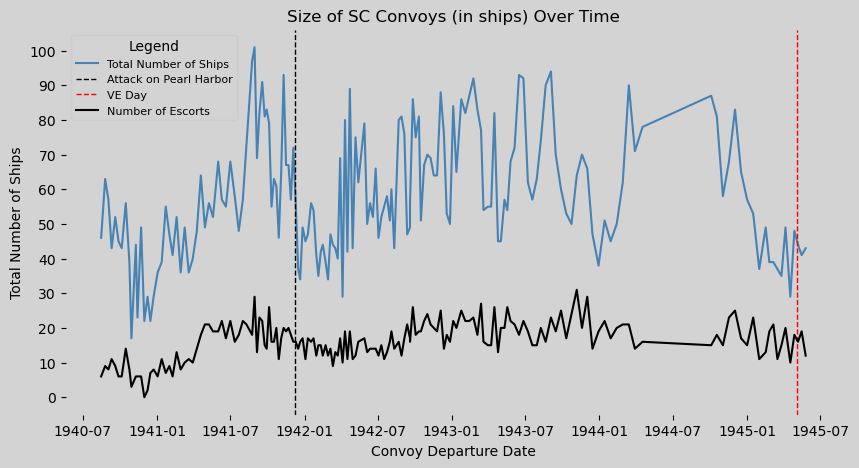

In [6]:

window = 5
sc['Moving_Avg_Ships'] = sc['Number of Ships'].rolling(window=window).mean()
fig, ax = plt.subplots(figsize=(10, 5), facecolor='lightgrey')
ax.plot(sc['Depart_Date'], sc['Number of Ships'], color='steelblue', label='Total Number of Ships')
ax.set_xlabel('Convoy Departure Date')
ax.set_ylabel('Total Number of Ships')
ax.set_facecolor('lightgrey')
US_War = pd.to_datetime('1941-12-07')
VE_Day = pd.to_datetime('1945-05-05')
plt.axvline(x=US_War, color='black', linestyle='--', linewidth=1, label='Attack on Pearl Harbor')
plt.axvline(x=VE_Day, color='red', linestyle='--', linewidth=1, label='VE Day')
plt.title('Size of SC Convoys (in ships) Over Time')
#ax2 = ax.twinx()
#ax.plot(sc['Depart_Date'], sc['Moving_Avg_Ships'], color='red', label='Moving Average')
#x = mdates.date2num(sc['Depart_Date'])
#y = sc['Number of Ships']
#z = np.polyfit(x, sc['Number of Ships'], 25)
#p = np.poly1d(z)
#plt.plot(x, p(x))
plt.yticks(np.arange(0,110,10))
plt.plot(sc['Depart_Date'], sc['Number of Escort Ships'], color='black', label='Number of Escorts')
plt.legend(title='Legend', facecolor='lightgrey', loc='upper left', markerscale=.5, fontsize=8)
for spine in plt.gca().spines.values():
    spine.set_visible(False)
ax.xaxis.set_major_locator(MonthLocator(bymonth=(1, 7)))
plt.show()


<BarContainer object of 177 artists>

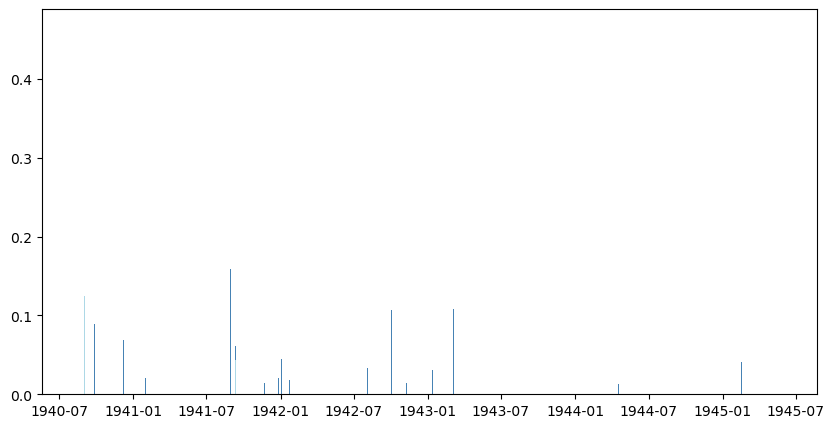

In [14]:
fig, ax = plt.subplots(figsize=(10, 5))
ax.bar(sc['Depart_Date'], sc['Overall Sink Rate'], color='steelblue')
ax.xaxis.set_major_locator(MonthLocator(bymonth=(1, 7)))
ax.set_yticks(np.arange(0, 0.6, 0.1))
ax.bar(sc['Depart_Date'], sc['Escort Sink Rate'], color='lightblue')